<a href="https://colab.research.google.com/github/bingshiun/Spring_HackaRoo/blob/master/HACK_RO0_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/data/road.csv"
df = pd.read_csv(path)
df

,OBJECTID,COUNTYL,PASER
0,4828,125,3
1,3463,125,3
2,1595,125,5
3,3108,125,3
4,3470,125,3
...,...,...,...
77138,209665,163,7
77139,208344,163,7
77140,209006,99,9
77141,208954,163,6


categorical Y

In [0]:
def func(x):
    if 0 < x <= 4:
        return '1'
    elif 5 <= x <= 7:
        return '2'
    elif 8 <= x <=10:
        return '3'

df['con'] = df['PASER'].apply(func)

crime

In [0]:
def func(y):
    if y == 147:
        return '3350'
    elif y == 125:
        return '23059'
    elif y == 99:
        return '14741'
    elif y == 161:
        return '6372'
    elif y == 93:
        return '1815'
    elif y == 115:
        return '2725'
    elif y == 163:
        return '44179'  

df['crime'] = df['COUNTYL'].apply(func)

education

In [0]:
def func(y):
    if y == 147:
        return '108322'
    elif y == 125:
        return '682505'
    elif y == 99:
        return '516104'
    elif y == 161:
        return '177638'
    elif y == 93:
        return '130804'
    elif y == 115:
        return '101171'
    elif y == 163:
        return '662371'  

df['edu'] = df['COUNTYL'].apply(func)

income

In [0]:
def func(y):
    if y == 147:
        return '57170'
    elif y == 125:
        return '83297'
    elif y == 99:
        return '63977'
    elif y == 161:
        return '77059'
    elif y == 93:
        return '82934'
    elif y == 115:
        return '62214'
    elif y == 163:
        return '60709'  

df['inc'] = df['COUNTYL'].apply(func)

In [0]:
df

,OBJECTID,COUNTYL,PASER,con,crime,edu,inc
0,4828,125,3,1,23059,682505,83297
1,3463,125,3,1,23059,682505,83297
2,1595,125,5,2,23059,682505,83297
3,3108,125,3,1,23059,682505,83297
4,3470,125,3,1,23059,682505,83297
...,...,...,...,...,...,...,...
77138,209665,163,7,2,44179,662371,60709
77139,208344,163,7,2,44179,662371,60709
77140,209006,99,9,3,14741,516104,63977
77141,208954,163,6,2,44179,662371,60709


In [0]:
feat = ['inc', 'edu','crime']
x = df[feat]
y = df.con

In [0]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

**MNLogit model**

1) statsmodels

In [0]:
y = np.array(df.con)
x = np.array(df[feat])

In [0]:
import statsmodels.api as sm

log = sm.MNLogit(y_train.astype(float),sm.add_constant(X_train).astype(float))
res = log.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 1.021937
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: MNLogit
==================================================================
Model:              MNLogit          Pseudo R-squared: 0.015      
Dependent Variable: con              AIC:              118268.4494
Date:               2020-06-05 21:56 BIC:              118340.1752
No. Observations:   57857            Log-Likelihood:   -59126.    
Df Model:           6                LL-Null:          -60015.    
Df Residuals:       57849            LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
----------------------------------------------------------------
 con = 0    Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
----------------------------------------------------------------
const      -0.9973    0.0840  -11.8782  0.0000  -1.1619  -0.8328
  inc       0.0000    0.0000   10.6564  0.0000   0.0000   0.0000
  edu      -0.0000    0.0000  -19.4509  0.0000  -0.0000  -0.0000
crime       0.0000    0.0000   19.8053  0.0000   0.0000   0.0000
----------------------------------------------------------------
 con = 1    Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
----------------------------------------------------------------
const      -2.3627    0.0971  -24.3314  0.0000  -2.5530  -2.1724
  inc       0.0000    0.0000   22.9641  0.0000   0.0000   0.0000
  edu      -0.0000    0.0000  -23.6705  0.0000  -0.0000  -0.0000
crime       0.0000    0.0000   10.8241  0.0000   0.0000   0.0000
==================================================================

"""

2) Pandas

In [0]:
mod = LogisticRegression(multi_class='multinomial').fit(X_train,y_train)

In [0]:
#res = mod.fit(X_train,y_train)
ypred = mod.predict(X_test)
print(mod.decision_function(X_test))

[[ 0.46194277  0.26832544 -0.73026821]
 [ 0.18206101 -0.01305866 -0.16900235]
 [ 0.18206101 -0.01305866 -0.16900235]
 ...
 [ 0.16169623 -0.05254478 -0.10915145]
 [ 0.46194277  0.26832544 -0.73026821]
 [ 0.18206101 -0.01305866 -0.16900235]]
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [0]:
mod.score(X_test,y_test)

0.46982266929378824

In [0]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, ypred)
cnf_matrix
#metrics.accuracy_score(y_test, ypred)

array([[9061,    0,    0],
       [6509,    0,    0],
       [3716,    0,    0]])

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

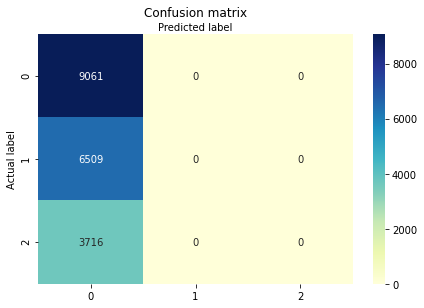

In [0]:
class_names=[1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**OLS model**

In [0]:
logy = np.log((df.con).astype(float))
olsx = np.array(df[feat]).astype(float)
X_train,X_test,y_train,y_test=train_test_split(olsx,logy,test_size=0.25,random_state=0)

In [0]:
omod = sm.OLS(y_train,sm.add_constant(X_train))
ores = omod.fit()
ores.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.020     
Dependent Variable: con              AIC:                68852.1621
Date:               2020-06-05 22:14 BIC:                68888.0250
No. Observations:   57857            Log-Likelihood:     -34422.   
Df Model:           3                F-statistic:        398.3     
Df Residuals:       57853            Prob (F-statistic): 4.07e-256 
R-squared:          0.020            Scale:              0.19245   
---------------------------------------------------------------------
            Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const       0.1962     0.0159    12.3164   0.0000    0.1650    0.2274
x1          0.0000     0.0000    23.3604   0.0000    0.0000    0.0000
x2         -0.0000     0.0000   -28.9459   0.0000   -0.0000   -0.0000
x3          0.0000     0.0000    19.3378   0.0000    0.0000    0.0000
-------------------------------------------------------------------
Omnibus:            331376.752      Durbin-Watson:         2.000   
Prob(Omnibus):      0.000           Jarque-Bera (JB):      5931.772
Skew:               0.194           Prob(JB):              0.000   
Kurtosis:           1.480           Condition No.:         4858726 
===================================================================
* The condition number is large (5e+06). This might indicate
strong multicollinearity or other numerical problems.
"""